In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Data Segregation

In [19]:
df = pd.read_csv('final.csv')
df = df[df['ARR_DEL15']==1]
df.keys()

Index(['Unnamed: 0', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_DELAY', 'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_DELAY',
       'ARR_DEL15', 'windspeedKmph', 'winddirDegree', 'weatherCode',
       'precipMM', 'visibility', 'pressure', 'cloudcover', 'DewPointF',
       'WindGustKmph', 'tempF', 'WindChillF', 'humidity'],
      dtype='object')

In [ ]:
del df['Unnamed: 0']

df = df.drop(['ARR_DEL15','DEP_DEL15'],1)

X = np.array((df.drop(['ARR_DELAY'],1)))
y = np.array((df['ARR_DELAY']))

## Linear Regression

In [31]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

regression_model = LinearRegression()
regression_model.fit(x_train , y_train)
pred = regression_model.predict(x_test)

mse = mean_squared_error(y_test , pred)
r2 = r2_score(y_test , pred)
mae = mean_absolute_error(y_test, pred)

print('Mean Absolute Error     : ', mae)
print('Root mean squared error : ', np.sqrt(mse))
print('R2 score                : ', r2)


Mean Absolute Error     :  14.896432717087514
Root mean squared error :  20.23567721359128
R2 score                :  0.922336995582719


## XGBoost

In [44]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

clf = GradientBoostingRegressor(n_estimators=300)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test , pred)
mae = mean_absolute_error(y_test, pred)

print('Mean Absolute Error     : ', mae)
print('Root mean squared error : ', np.sqrt(mse))
print('R2 score                : ', r2)

Mean Absolute Error     :  11.548780300408483
Root mean squared error :  16.763527300918103
R2 score                :  0.9467021717408268


### Feature Importance

In [55]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.995116)
2. feature 11 (0.001188)
3. feature 7 (0.000749)
4. feature 4 (0.000589)
5. feature 15 (0.000397)
6. feature 10 (0.000299)
7. feature 8 (0.000291)
8. feature 3 (0.000243)
9. feature 5 (0.000202)
10. feature 17 (0.000146)
11. feature 1 (0.000140)
12. feature 2 (0.000130)
13. feature 13 (0.000124)
14. feature 16 (0.000107)
15. feature 9 (0.000079)
16. feature 19 (0.000071)
17. feature 18 (0.000064)
18. feature 12 (0.000027)
19. feature 14 (0.000025)
20. feature 0 (0.000011)


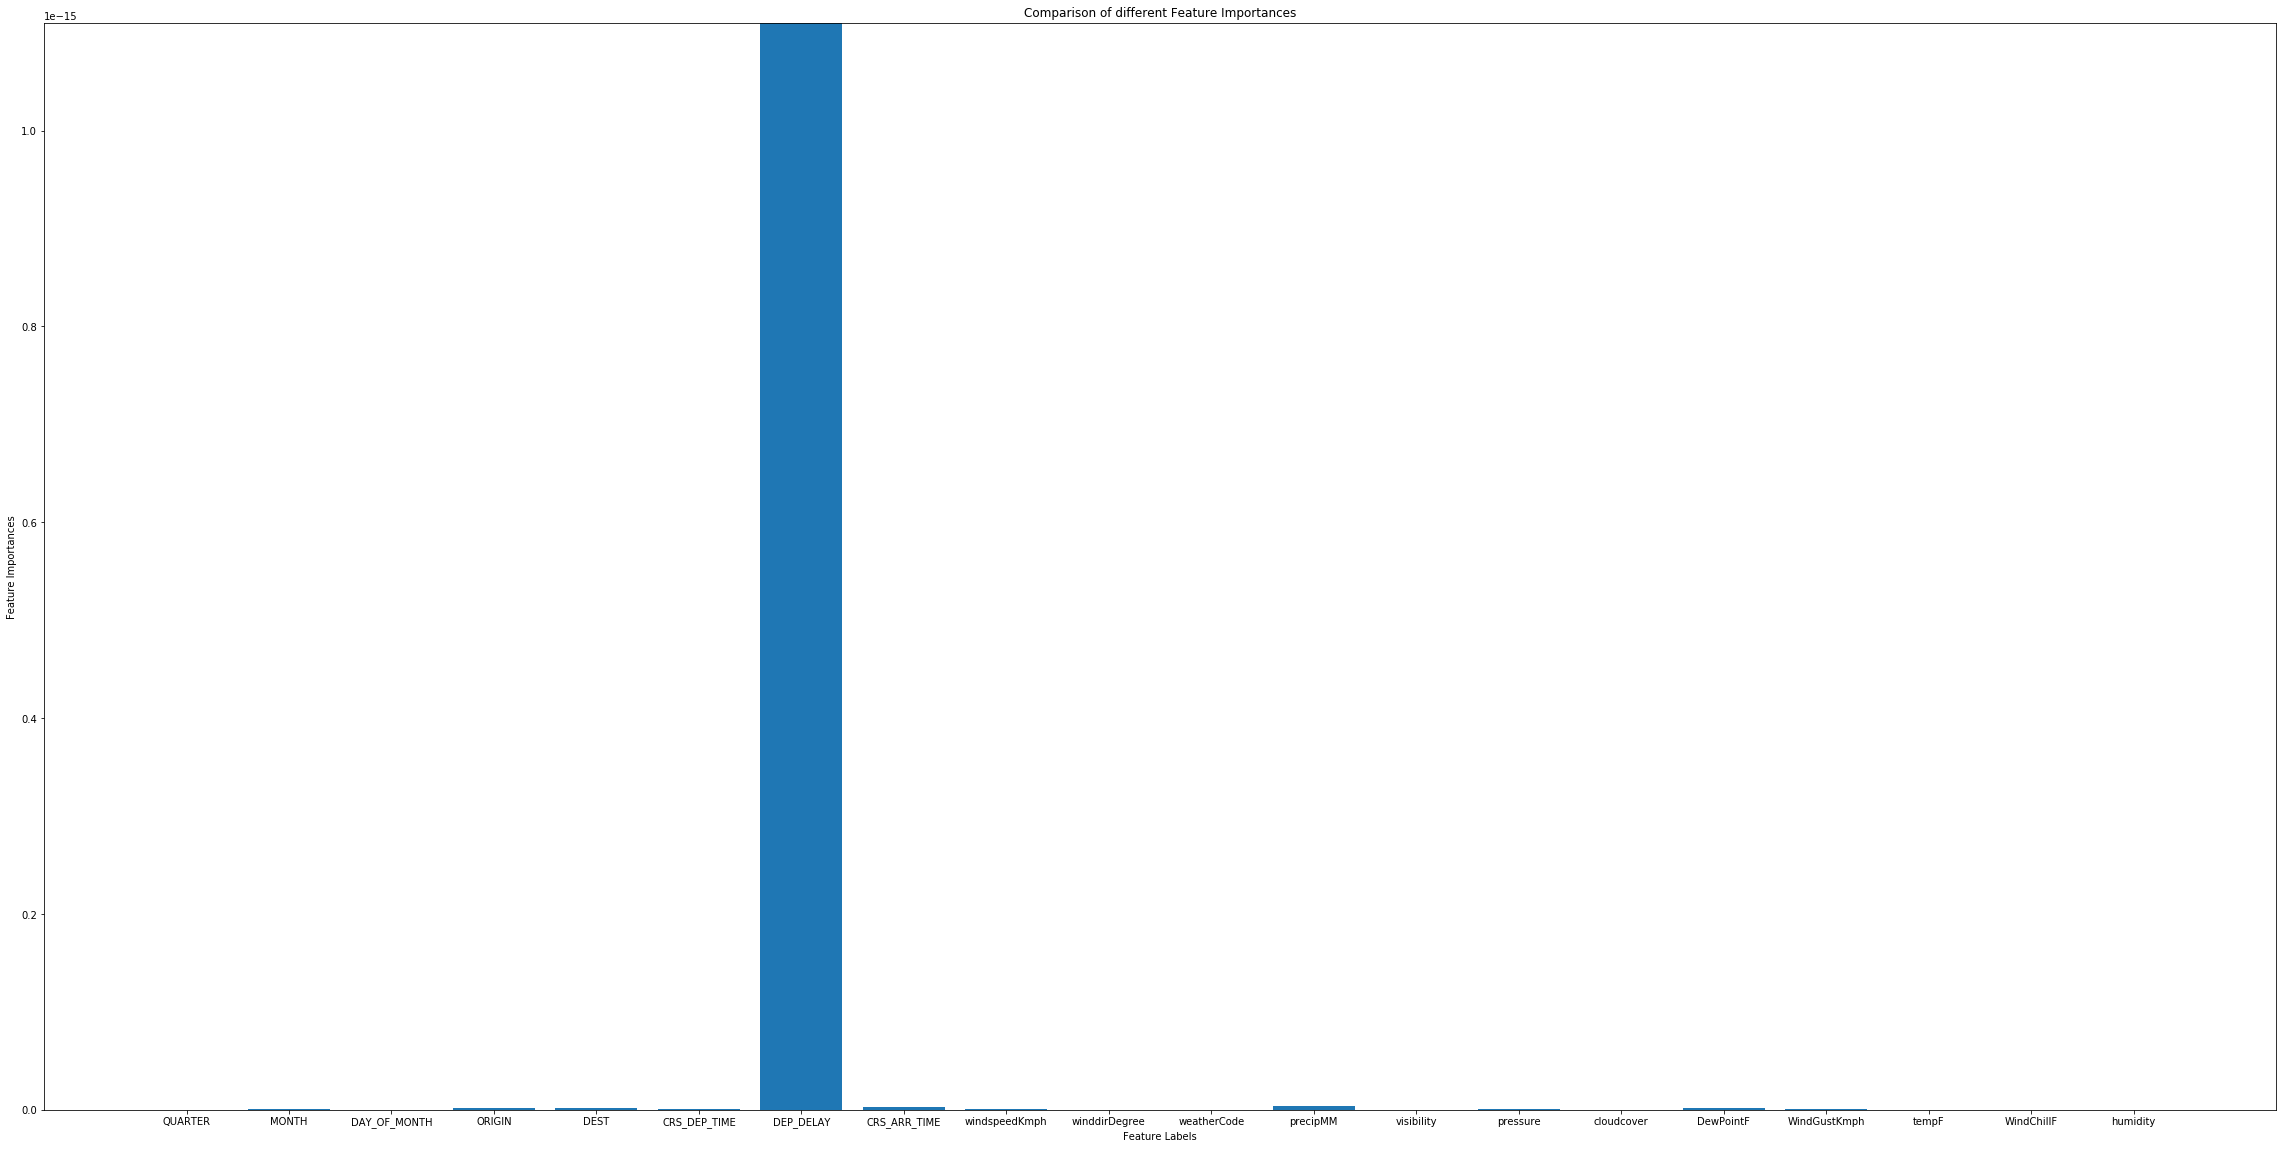

In [56]:
X = df.drop('ARR_DELAY',1)
feature_importance = clf.feature_importances_
feature_importance_normalized = np.std([clf.feature_importances_ for tree in clf.estimators_], axis = 0)
plt.figure(figsize=(40,20))
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

## Extra Trees

In [34]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

etr = ExtraTreesRegressor(n_estimators=300)
etr.fit(x_train,y_train)
pred = etr.predict(x_test)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test , pred)
mae = mean_absolute_error(y_test, pred)

print('Mean Absolute Error     : ', mae)
print('Root mean squared error : ', np.sqrt(mse))
print('R2 score                : ', r2)

Mean Absolute Error     :  11.782708852660065
Root mean squared error :  16.813375027179333
R2 score                :  0.9463847295252529


### Feature Importance

In [59]:
importances = etr.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.944274)
2. feature 7 (0.003959)
3. feature 3 (0.003930)
4. feature 5 (0.003849)
5. feature 2 (0.003258)
6. feature 9 (0.003234)
7. feature 16 (0.003180)
8. feature 8 (0.003176)
9. feature 13 (0.003127)
10. feature 19 (0.003093)
11. feature 10 (0.003081)
12. feature 15 (0.002998)
13. feature 14 (0.002868)
14. feature 4 (0.002836)
15. feature 17 (0.002677)
16. feature 18 (0.002609)
17. feature 11 (0.002426)
18. feature 1 (0.002265)
19. feature 12 (0.001617)
20. feature 0 (0.001545)


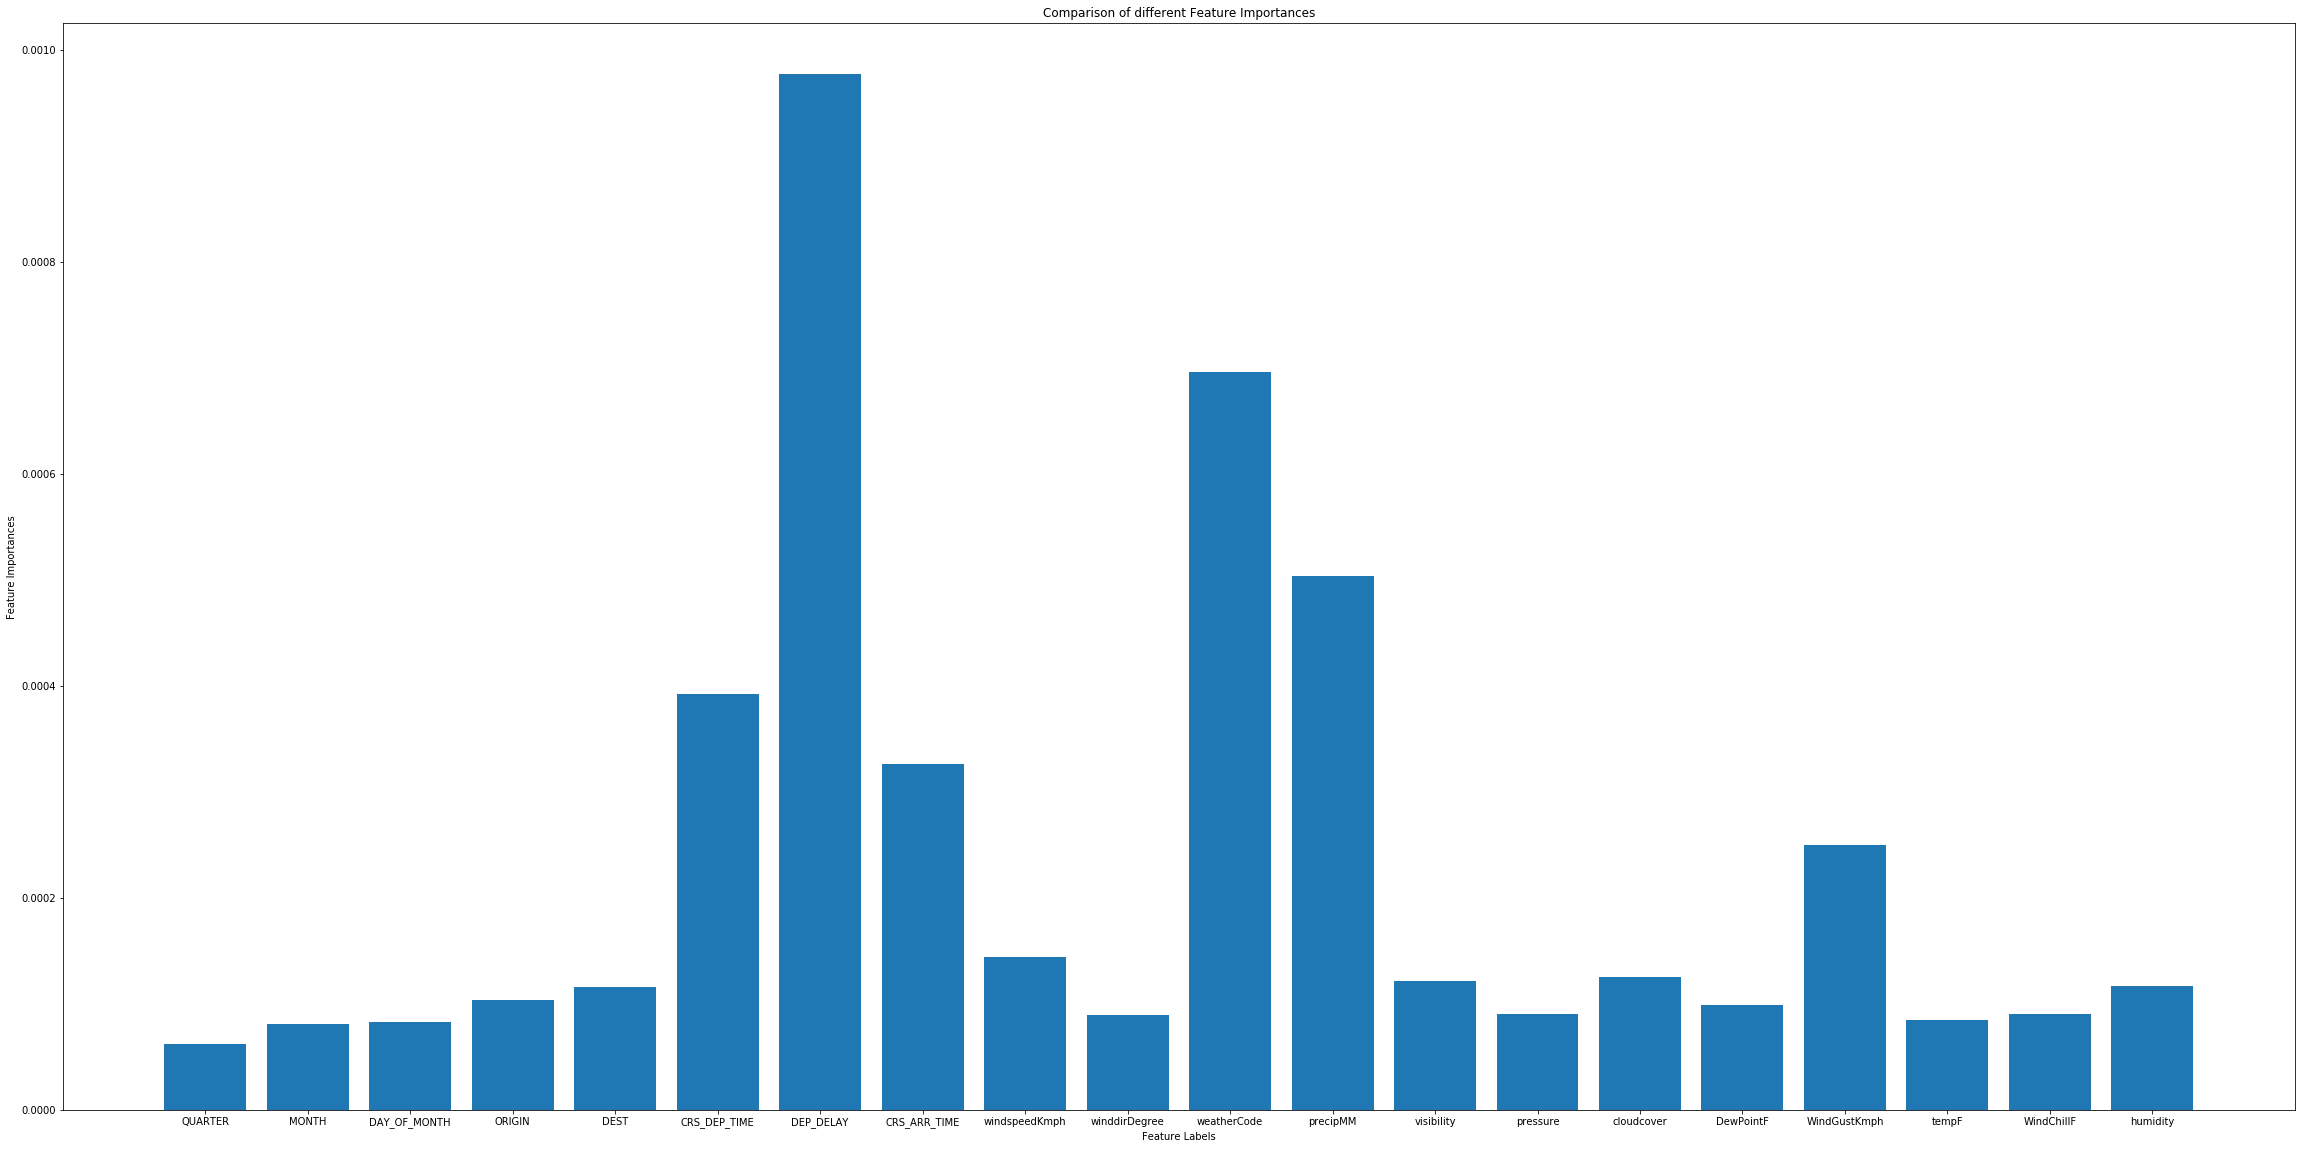

In [49]:
X = df.drop('ARR_DELAY',1)
feature_importance = etr.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in etr.estimators_], axis = 0)
plt.figure(figsize=(40,20))
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 